In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "C:/Users/Dell/Desktop/coding/python/plants_and_bees.csv"
df = pd.read_csv(path)

In [3]:
df.describe()

,sample_id,species_num,time,parasitic,nonnative_bee
count,1250.000000,1250.000000,1250.000000,1187.000000,1189.000000
mean,17441.209600,22.450400,1069.160000,0.074136,0.029437
std,22.649293,13.691074,199.032524,0.262103,0.169098
min,17400.000000,1.000000,900.000000,0.000000,0.000000
25%,17424.000000,12.000000,930.000000,0.000000,0.000000
50%,17442.000000,20.000000,1015.000000,0.000000,0.000000
75%,17461.000000,32.000000,1105.000000,0.000000,0.000000
max,17481.000000,60.000000,1730.000000,1.000000,1.000000


In [4]:
dataset = pd.concat([df.head(), df.tail()])
dataset

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0
1245,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1246,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1247,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1248,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1249,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       1250 non-null   int64  
 1   species_num     1250 non-null   int64  
 2   date            1250 non-null   object 
 3   season          1250 non-null   object 
 4   site            1250 non-null   object 
 5   native_or_non   1250 non-null   object 
 6   sampling        1250 non-null   object 
 7   plant_species   1250 non-null   object 
 8   time            1250 non-null   int64  
 9   bee_species     1250 non-null   object 
 10  sex             1250 non-null   object 
 11  specialized_on  7 non-null      object 
 12  parasitic       1187 non-null   float64
 13  nesting         1196 non-null   object 
 14  status          15 non-null     object 
 15  nonnative_bee   1189 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 156.4+ KB


In [6]:
def plant_bees_info():
    temp = pd.DataFrame(index=df.columns)
    temp["Datatype"] = df.dtypes
    temp["Not null values"] = df.count()
    temp["Null values"] = df.isnull().sum()
    temp["Percentage of Null values"] = (df.isnull().mean())*100
    temp["Unique count"] = df.nunique()
    return temp
plant_bees_info()

,Datatype,Not null values,Null values,Percentage of Null values,Unique count
sample_id,int64,1250,0,0.00,80
species_num,int64,1250,0,0.00,34
date,object,1250,0,0.00,9
season,object,1250,0,0.00,2
site,object,1250,0,0.00,3
native_or_non,object,1250,0,0.00,2
sampling,object,1250,0,0.00,2
plant_species,object,1250,0,0.00,24
time,int64,1250,0,0.00,44
bee_species,object,1250,0,0.00,93


In [7]:
df = df.drop(['specialized_on','status'], axis = 1)

In [8]:
print(df.isnull().sum())

sample_id         0
species_num       0
date              0
season            0
site              0
native_or_non     0
sampling          0
plant_species     0
time              0
bee_species       0
sex               0
parasitic        63
nesting          54
nonnative_bee    61
dtype: int64


In [9]:
def convert_bool(val):
    return bool ( val )

In [10]:
df['nonnative_bee'] = df['nonnative_bee'].apply(lambda x: convert_bool(x))
df['parasitic'] = df['parasitic'].apply(lambda x: convert_bool(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sample_id      1250 non-null   int64 
 1   species_num    1250 non-null   int64 
 2   date           1250 non-null   object
 3   season         1250 non-null   object
 4   site           1250 non-null   object
 5   native_or_non  1250 non-null   object
 6   sampling       1250 non-null   object
 7   plant_species  1250 non-null   object
 8   time           1250 non-null   int64 
 9   bee_species    1250 non-null   object
 10  sex            1250 non-null   object
 11  parasitic      1250 non-null   bool  
 12  nesting        1196 non-null   object
 13  nonnative_bee  1250 non-null   bool  
dtypes: bool(2), int64(3), object(9)
memory usage: 119.8+ KB


In [11]:
df[df['nonnative_bee']!=False].head()

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,parasitic,nesting,nonnative_bee
5,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,False,hive,True
6,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,False,hive,True
7,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,False,hive,True
8,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,False,hive,True
9,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,False,hive,True


In [12]:
print(df.isnull().sum())

sample_id         0
species_num       0
date              0
season            0
site              0
native_or_non     0
sampling          0
plant_species     0
time              0
bee_species       0
sex               0
parasitic         0
nesting          54
nonnative_bee     0
dtype: int64


In [13]:
df.nesting.unique()

array(['ground', 'hive', 'wood', 'parasite [ground]', 'wood/shell', nan,
       'wood/cavities'], dtype=object)

In [14]:
df["nesting"].fillna("No nesting", inplace = True) 
df.nesting.unique()

array(['ground', 'hive', 'wood', 'parasite [ground]', 'wood/shell',
       'No nesting', 'wood/cavities'], dtype=object)

In [15]:
print(df.isnull().sum())

sample_id        0
species_num      0
date             0
season           0
site             0
native_or_non    0
sampling         0
plant_species    0
time             0
bee_species      0
sex              0
parasitic        0
nesting          0
nonnative_bee    0
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sample_id      1250 non-null   int64 
 1   species_num    1250 non-null   int64 
 2   date           1250 non-null   object
 3   season         1250 non-null   object
 4   site           1250 non-null   object
 5   native_or_non  1250 non-null   object
 6   sampling       1250 non-null   object
 7   plant_species  1250 non-null   object
 8   time           1250 non-null   int64 
 9   bee_species    1250 non-null   object
 10  sex            1250 non-null   object
 11  parasitic      1250 non-null   bool  
 12  nesting        1250 non-null   object
 13  nonnative_bee  1250 non-null   bool  
dtypes: bool(2), int64(3), object(9)
memory usage: 119.8+ KB


In [17]:
df[df.duplicated()].shape[0]

599

In [18]:
df = df.drop_duplicates()

In [19]:
df.shape

(651, 14)

In [20]:
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 1243
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sample_id      651 non-null    int64         
 1   species_num    651 non-null    int64         
 2   date           651 non-null    datetime64[ns]
 3   season         651 non-null    object        
 4   site           651 non-null    object        
 5   native_or_non  651 non-null    object        
 6   sampling       651 non-null    object        
 7   plant_species  651 non-null    object        
 8   time           651 non-null    int64         
 9   bee_species    651 non-null    object        
 10  sex            651 non-null    object        
 11  parasitic      651 non-null    bool          
 12  nesting        651 non-null    object        
 13  nonnative_bee  651 non-null    bool          
dtypes: bool(2), datetime64[ns](1), int64(3), object(8)
memory usage: 67.4+ KB

In [21]:
plant_bees_info()

,Datatype,Not null values,Null values,Percentage of Null values,Unique count
sample_id,int64,651,0,0.0,80
species_num,int64,651,0,0.0,34
date,datetime64[ns],651,0,0.0,9
season,object,651,0,0.0,2
site,object,651,0,0.0,3
native_or_non,object,651,0,0.0,2
sampling,object,651,0,0.0,2
plant_species,object,651,0,0.0,24
time,int64,651,0,0.0,44
bee_species,object,651,0,0.0,93


In [22]:
df.describe()

,sample_id,species_num,time
count,651.000000,651.000000,651.000000
mean,17440.874040,21.276498,1078.548387
std,22.654586,14.046200,208.262605
min,17400.000000,1.000000,900.000000
25%,17423.500000,9.000000,930.000000
50%,17441.000000,20.000000,1015.000000
75%,17461.000000,32.000000,1105.000000
max,17481.000000,60.000000,1730.000000


In [23]:
print(df['plant_species'])

0                    None
1                    None
3                    None
4                    None
5                    None
              ...        
1232                 None
1233                 None
1236                 None
1237                 None
1243    Cichorium intybus
Name: plant_species, Length: 651, dtype: object


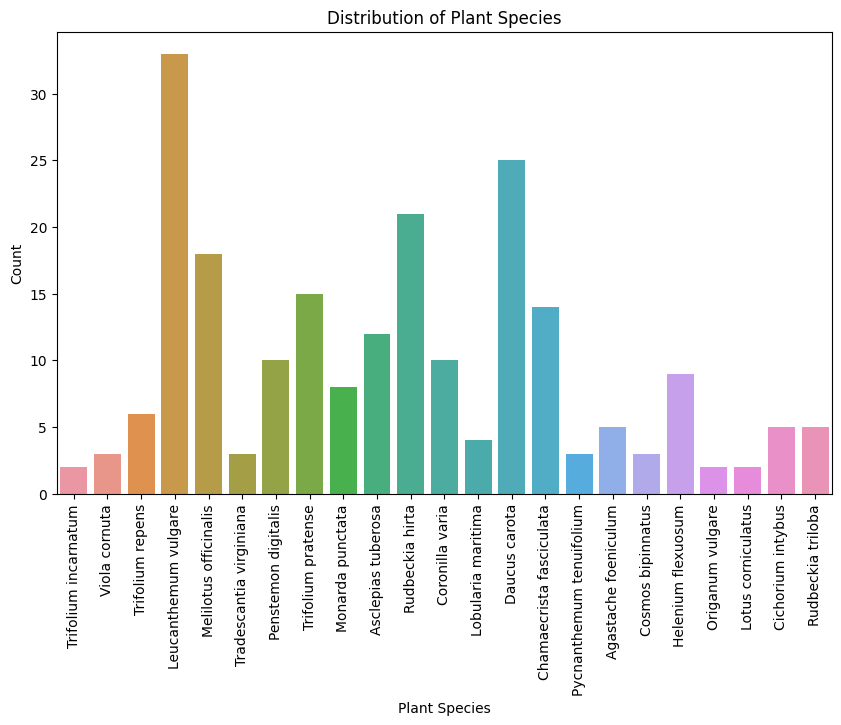

In [24]:
filtered_df = df[df['plant_species'] != 'None']

# Countplot of plant species
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='plant_species')
plt.xticks(rotation=90)
plt.xlabel('Plant Species')
plt.ylabel('Count')
plt.title('Distribution of Plant Species')
plt.show()            

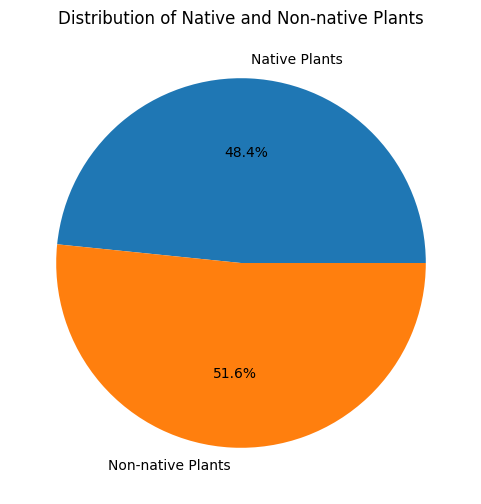

In [25]:
# Count the number of native and non-native plants
native_counts = df[df['native_or_non'] == 'native'].shape[0]
non_native_counts = df[df['native_or_non'] == 'non-native'].shape[0]
labels = ['Native Plants', 'Non-native Plants']
values = [native_counts, non_native_counts]
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Native and Non-native Plants')
plt.show()

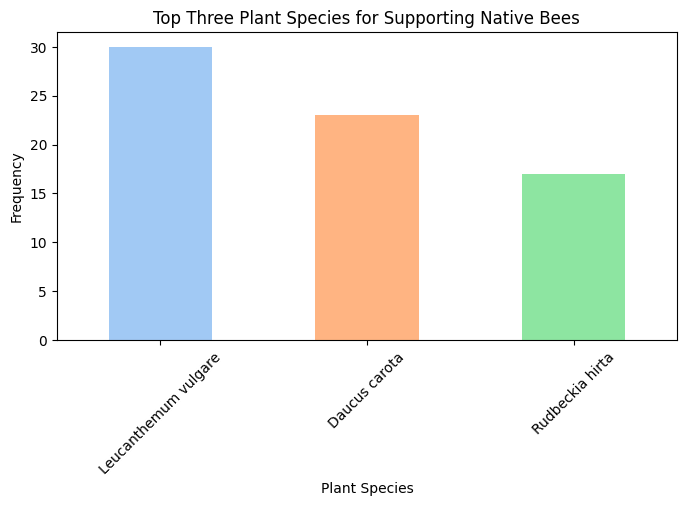

In [39]:
native_bees_df = df[(df['nonnative_bee'] == False) & (df['plant_species'] != 'None')]
plant_species_counts = native_bees_df['plant_species'].value_counts()
top_three_species = plant_species_counts.head(3)
colors = sns.color_palette('pastel')
# Bar plot of the top three plant species
plt.figure(figsize=(8,4))
top_three_species.plot(kind='bar', color=colors)
plt.xlabel('Plant Species')
plt.ylabel('Frequency')
plt.title('Top Three Plant Species for Supporting Native Bees')
plt.xticks(rotation=45)
plt.show();


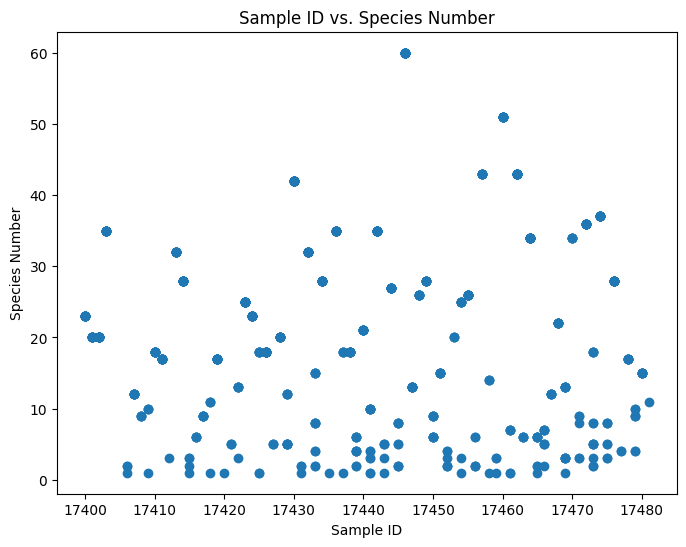

In [27]:
#Scatter plot of sample_id and species_num
plt.figure(figsize=(8, 6))
plt.scatter(df['sample_id'], df['species_num'])
plt.xlabel('Sample ID')
plt.ylabel('Species Number')
plt.title('Sample ID vs. Species Number')
plt.show()

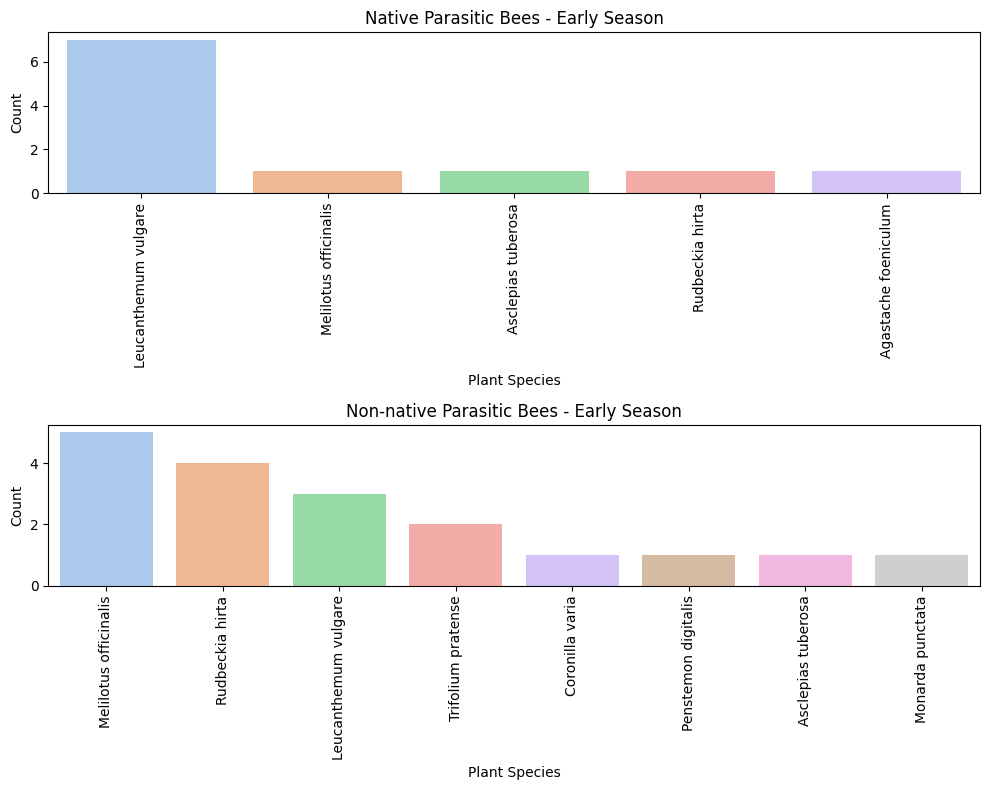

In [28]:
early_native_season = df[(df['season'] == 'early.season') & (df['parasitic'] == True) & (df['plant_species'] != 'None') & (~df['nonnative_bee'])]

early_native_counts = early_native_season['plant_species'].value_counts()

early_nonnative_season = df[(df['season'] == 'early.season') & (df['parasitic'] == True) & (df['plant_species'] != 'None') & (df['nonnative_bee'])]

early_nonnative_counts = early_nonnative_season['plant_species'].value_counts()

late_native_season = df[(df['season'] == 'late.season') & (df['parasitic'] == True) & (df['plant_species'] != 'None') & (~df['nonnative_bee'])]

late_native_counts = late_native_season['plant_species'].value_counts()

late_nonnative_season = df[(df['season'] == 'late.season') & (df['parasitic'] == True) & (df['plant_species'] != 'None') & (df['nonnative_bee'])]

late_nonnative_counts = late_nonnative_season['plant_species'].value_counts()

colors = sns.color_palette('pastel')

fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

# Plotting for early season native parasitic bees
sns.barplot(x=early_native_counts.index, y=early_native_counts.values, palette=colors, ax=axes[0])
axes[0].set_title('Native Parasitic Bees - Early Season')
axes[0].set_xlabel('Plant Species')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plotting for early season non-native parasitic bees
sns.barplot(x=early_nonnative_counts.index, y=early_nonnative_counts.values, palette=colors, ax=axes[1])
axes[1].set_title('Non-native Parasitic Bees - Early Season')
axes[1].set_xlabel('Plant Species')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()




In [29]:
# Unique plant species
unique_plant_species = df['plant_species'].unique()
print("Unique Plant Species:")
print(unique_plant_species)

# Unique bee species
unique_bee_species = df['bee_species'].unique()
print("Unique Bee Species:")
print(unique_bee_species)


Unique Plant Species:
['None' 'Trifolium incarnatum' 'Viola cornuta' 'Trifolium repens'
 'Leucanthemum vulgare' 'Melilotus officinalis' 'Tradescantia virginiana'
 'Penstemon digitalis' 'Trifolium pratense' 'Monarda punctata'
 'Asclepias tuberosa' 'Rudbeckia hirta' 'Coronilla varia'
 'Lobularia maritima' 'Daucus carota' 'Chamaecrista fasciculata'
 'Pycnanthemum tenuifolium' 'Agastache foeniculum' 'Cosmos bipinnatus'
 'Helenium flexuosum' 'Origanum vulgare' 'Lotus corniculatus'
 'Cichorium intybus' 'Rudbeckia triloba']
Unique Bee Species:
['Augochlorella aurata' 'Agapostemon texanus' 'Andrena carlini'
 'Andrena perplexa' 'Apis mellifera' 'Lasioglossum tegulare'
 'Lasioglossum pectorale' 'Lasioglossum pilosum' 'Lasioglossum cressonii'
 'Lasioglossum trigeminum' 'Osmia pumila' 'Andrena miserabilis'
 'Lasioglossum versatum' 'Halictus poeyi/ligatus' 'Osmia atriventris'
 'Nomada bidentate_group' 'Osmia bucephala' 'Lasioglossum callidum'
 'Ceratina calcarata' 'Agapostemon splendens' 'Lasioglos

In [30]:
late_season = df[(df['season'] == 'late.season') & (df['plant_species'] != 'None')]

unique_plant_species_late = late_season['plant_species'].unique()

print("Unique Plant Species in Late Season:")
print(unique_plant_species_late)

Unique Plant Species in Late Season:
['Chamaecrista fasciculata' 'Monarda punctata' 'Trifolium pratense'
 'Melilotus officinalis' 'Daucus carota' 'Helenium flexuosum'
 'Pycnanthemum tenuifolium' 'Origanum vulgare' 'Agastache foeniculum'
 'Lotus corniculatus' 'Rudbeckia hirta' 'Cichorium intybus'
 'Cosmos bipinnatus' 'Rudbeckia triloba']


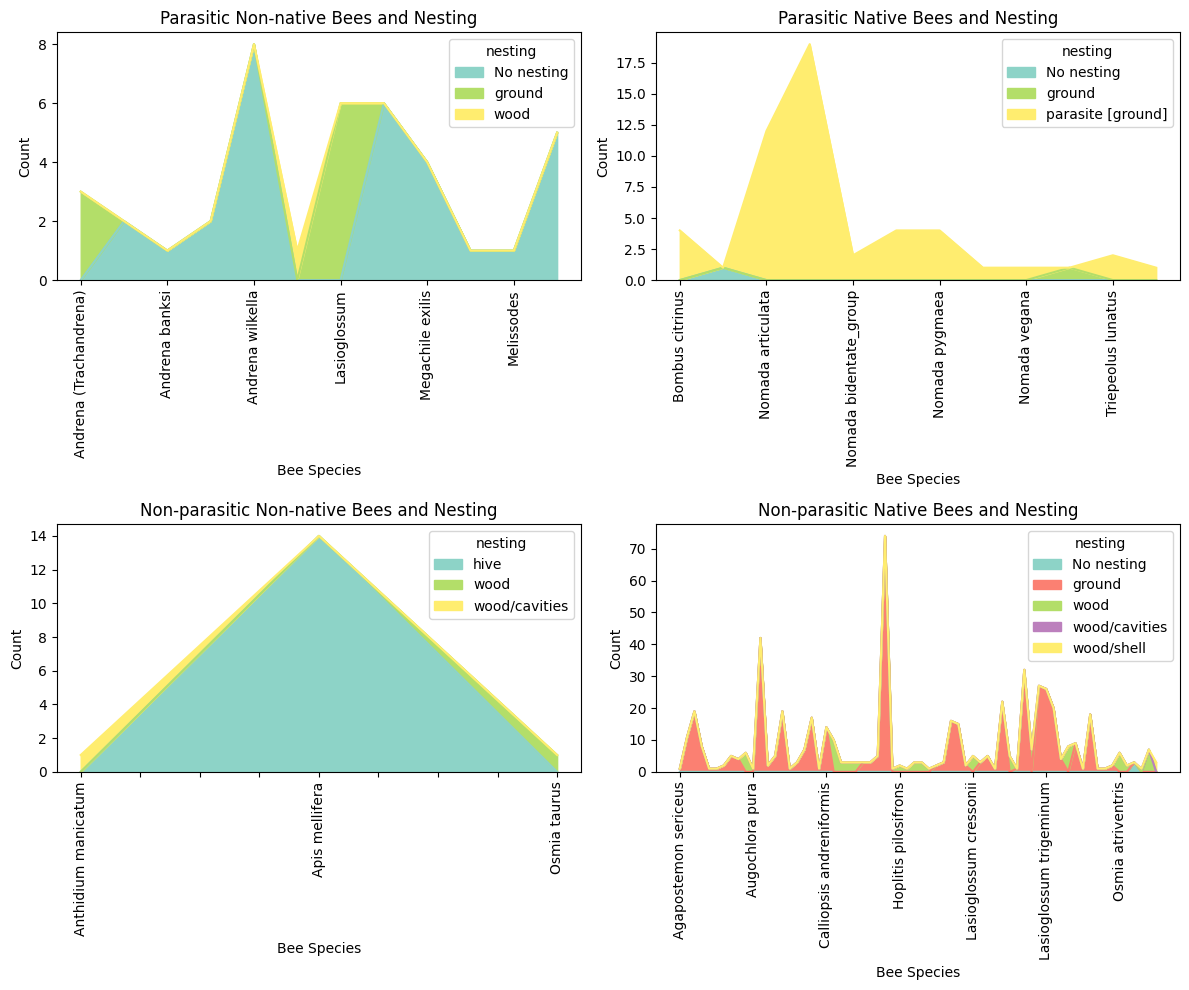

In [31]:
# Filtering the dataset for parasitic and non-parasitic bees and either non-native or native bees
parasitic_bees = df[df['parasitic'] == True]
nonparasitic_bees = df[df['parasitic'] == False]

parasitic_nonnative_bees = parasitic_bees[parasitic_bees['nonnative_bee'] == True]
parasitic_native_bees = parasitic_bees[parasitic_bees['nonnative_bee'] == False]

nonparasitic_nonnative_bees = nonparasitic_bees[nonparasitic_bees['nonnative_bee'] == True]
nonparasitic_native_bees = nonparasitic_bees[nonparasitic_bees['nonnative_bee'] == False]

cross_tab_parasitic_nonnative = pd.crosstab(parasitic_nonnative_bees['bee_species'], parasitic_nonnative_bees['nesting'])
cross_tab_parasitic_native = pd.crosstab(parasitic_native_bees['bee_species'], parasitic_native_bees['nesting'])
cross_tab_nonparasitic_nonnative = pd.crosstab(nonparasitic_nonnative_bees['bee_species'], nonparasitic_nonnative_bees['nesting'])
cross_tab_nonparasitic_native = pd.crosstab(nonparasitic_native_bees['bee_species'], nonparasitic_native_bees['nesting'])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

cross_tab_parasitic_nonnative.plot(kind='area', stacked=True, colormap='Set3', ax=axes[0, 0])
cross_tab_parasitic_native.plot(kind='area', stacked=True, colormap='Set3', ax=axes[0, 1])
cross_tab_nonparasitic_nonnative.plot(kind='area', stacked=True, colormap='Set3', ax=axes[1, 0])
cross_tab_nonparasitic_native.plot(kind='area', stacked=True, colormap='Set3', ax=axes[1, 1])

axes[0, 0].set_title('Parasitic Non-native Bees and Nesting')
axes[0, 0].set_xlabel('Bee Species')
axes[0, 0].set_ylabel('Count')

axes[0, 1].set_title('Parasitic Native Bees and Nesting')
axes[0, 1].set_xlabel('Bee Species')
axes[0, 1].set_ylabel('Count')

axes[1, 0].set_title('Non-parasitic Non-native Bees and Nesting')
axes[1, 0].set_xlabel('Bee Species')
axes[1, 0].set_ylabel('Count')

axes[1, 1].set_title('Non-parasitic Native Bees and Nesting')
axes[1, 1].set_xlabel('Bee Species')
axes[1, 1].set_ylabel('Count')

# Rotate x-axis labels
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()




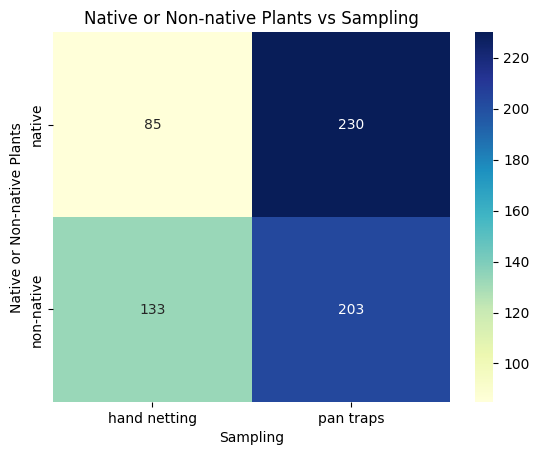

In [32]:
cross_tab = pd.crosstab(df['native_or_non'], df['sampling'])

# Plotting the heatmap
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')

plt.title('Native or Non-native Plants vs Sampling')
plt.xlabel('Sampling')
plt.ylabel('Native or Non-native Plants')

plt.show()


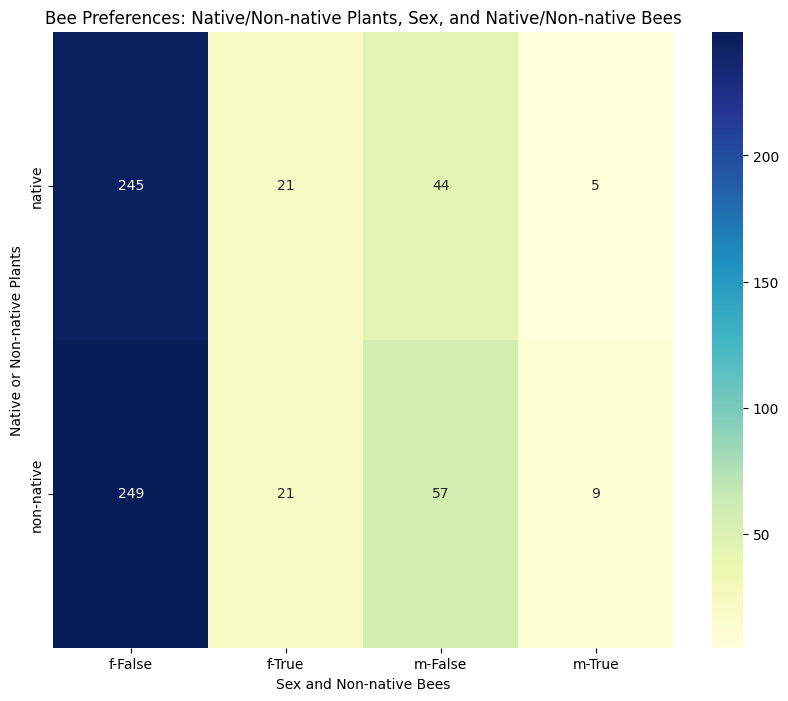

In [33]:
# Filter the dataset for native or non-native bees, native or non-native plants and sex.
filtered_df = df[['nonnative_bee', 'native_or_non', 'sex']]


cross_tab = pd.crosstab(filtered_df['native_or_non'], [filtered_df['sex'], filtered_df['nonnative_bee']])

plt.figure(figsize=(10, 8))

sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')

plt.title('Bee Preferences: Native/Non-native Plants, Sex, and Native/Non-native Bees')
plt.xlabel('Sex and Non-native Bees')
plt.ylabel('Native or Non-native Plants')

plt.show()




In [34]:
import plotly.graph_objects as go

# Count the occurrences of each nesting category
nesting_counts = df['nesting'].value_counts()

labels = nesting_counts.index
values = nesting_counts.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent')])

fig.update_layout(
    title='Nesting Distribution',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    font=dict(size=12)
)

fig.show()



C:\Users\Dell\AppData\Local\Temp\ipykernel_11852\702636792.py:22: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



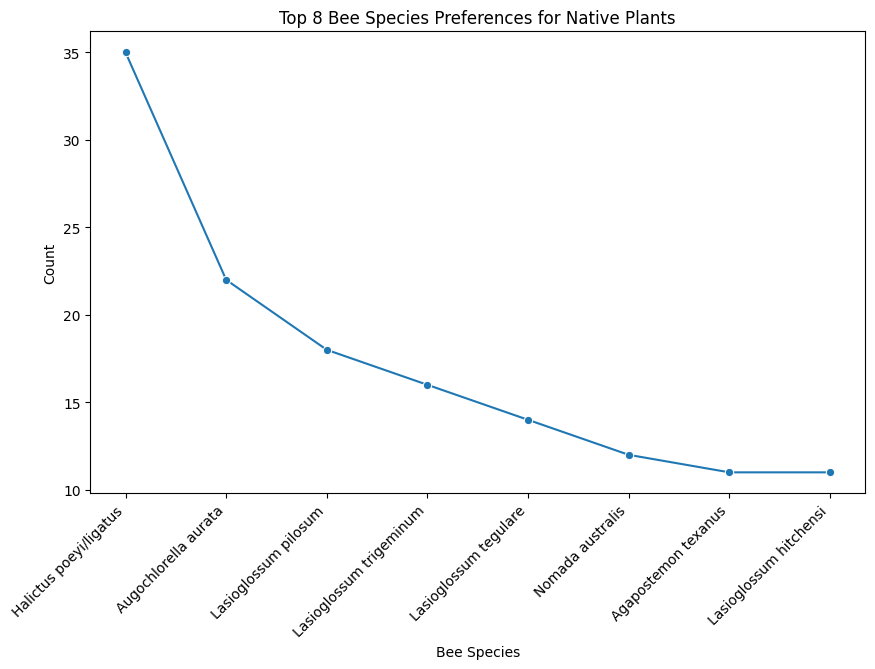

C:\Users\Dell\AppData\Local\Temp\ipykernel_11852\702636792.py:36: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



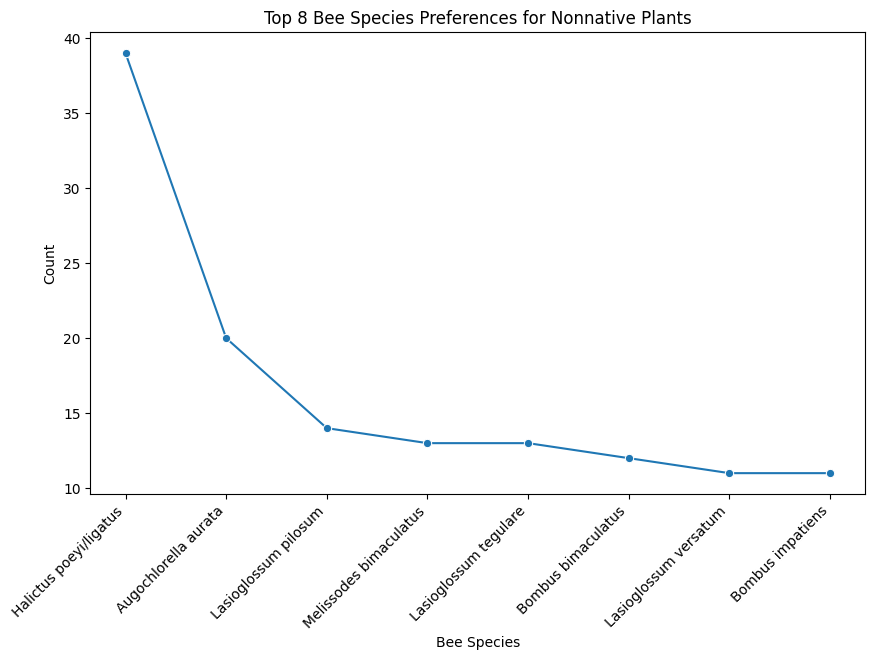

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for native plants
native_df = df[df['native_or_non'] == 'native']

# Filter the DataFrame for nonnative plants
nonnative_df = df[df['native_or_non'] == 'non-native']

# Count the occurrences of each bee species for native plants
native_bee_counts = native_df['bee_species'].value_counts().nlargest(8)

# Count the occurrences of each bee species for nonnative plants
nonnative_bee_counts = nonnative_df['bee_species'].value_counts().nlargest(8)

# Set custom color palettes
native_colors = sns.color_palette("Set1", n_colors=8)
nonnative_colors = sns.color_palette("Set2", n_colors=8)

# Plot the line plot for native plants
plt.figure(figsize=(10, 6))
sns.lineplot(x=native_bee_counts.index, y=native_bee_counts.values, marker='o', palette=native_colors)

# Set the title and labels for native plants
plt.title('Top 8 Bee Species Preferences for Native Plants')
plt.xlabel('Bee Species')
plt.ylabel('Count')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

# Plot the line plot for nonnative plants
plt.figure(figsize=(10, 6))
sns.lineplot(x=nonnative_bee_counts.index, y=nonnative_bee_counts.values, marker='o', palette=nonnative_colors)

# Set the title and labels for nonnative plants
plt.title('Top 8 Bee Species Preferences for Nonnative Plants')
plt.xlabel('Bee Species')
plt.ylabel('Count')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

